## Hello project - Jan 15, 2023
1. Import packages
2. Initiated data
3. Model 
4. Perform the inference 
5. Result analysis

In [9]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
from matplotlib import pyplot
from IPython.core.pylabtools import figsize
import arviz as az

In [2]:
np.random.seed(123)
trials = 20
theta_gt = 0.35
data = stats.bernoulli.rvs(p = theta_gt, size = trials)
print(data)

[1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0]


In [3]:
with pm.Model() as hello_model:
    theta = pm.Beta('theta', alpha = 1, beta = 1)
    y = pm.Bernoulli('y', p = theta, observed = data)


In [4]:
with hello_model:
    trace = pm.sample(100, random_seed = 123)
    

/Users/rubyliu/opt/anaconda3/envs/pm3env/lib/python3.8/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 12 seconds.
The acceptance probability does not match the target. It is 0.8850819288269147, but should be close to 0.8. Try to increase the number of tuning steps.


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/rubyliu/opt/anaconda3/envs/pm3env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/rubyliu/opt/anaconda3/envs/pm3env/lib/python3.8/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/rubyliu/opt/anaconda3/envs

<AxesSubplot: title={'center': 'theta'}>

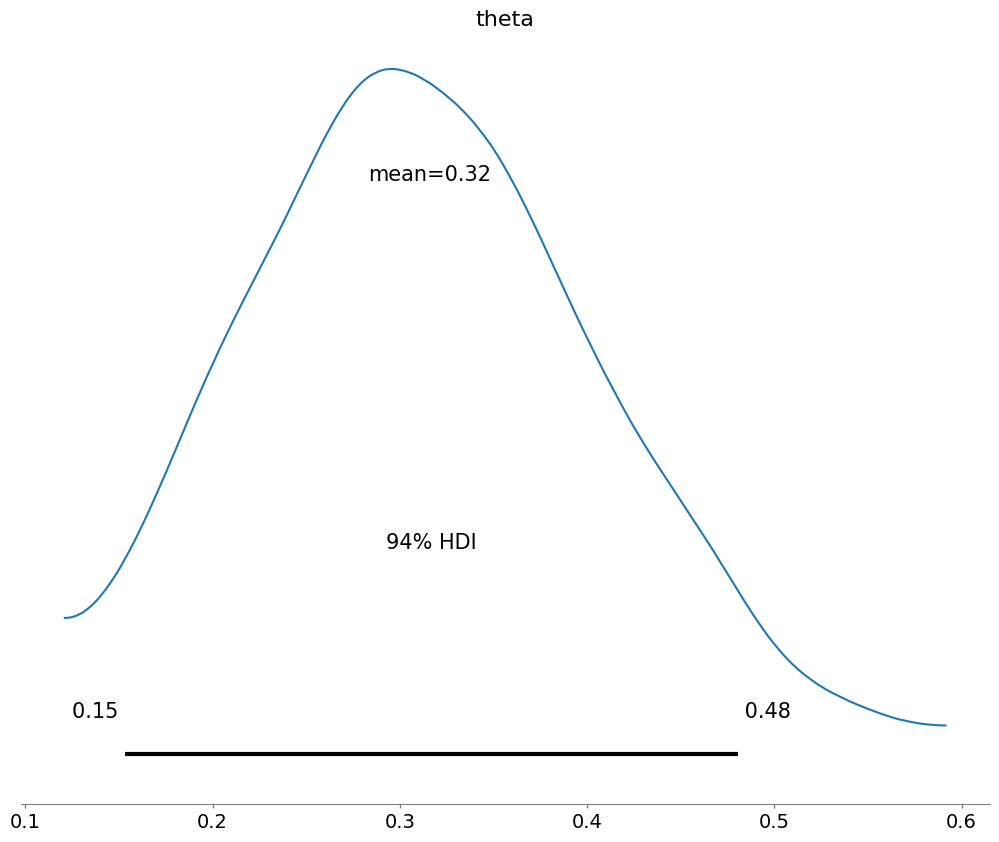

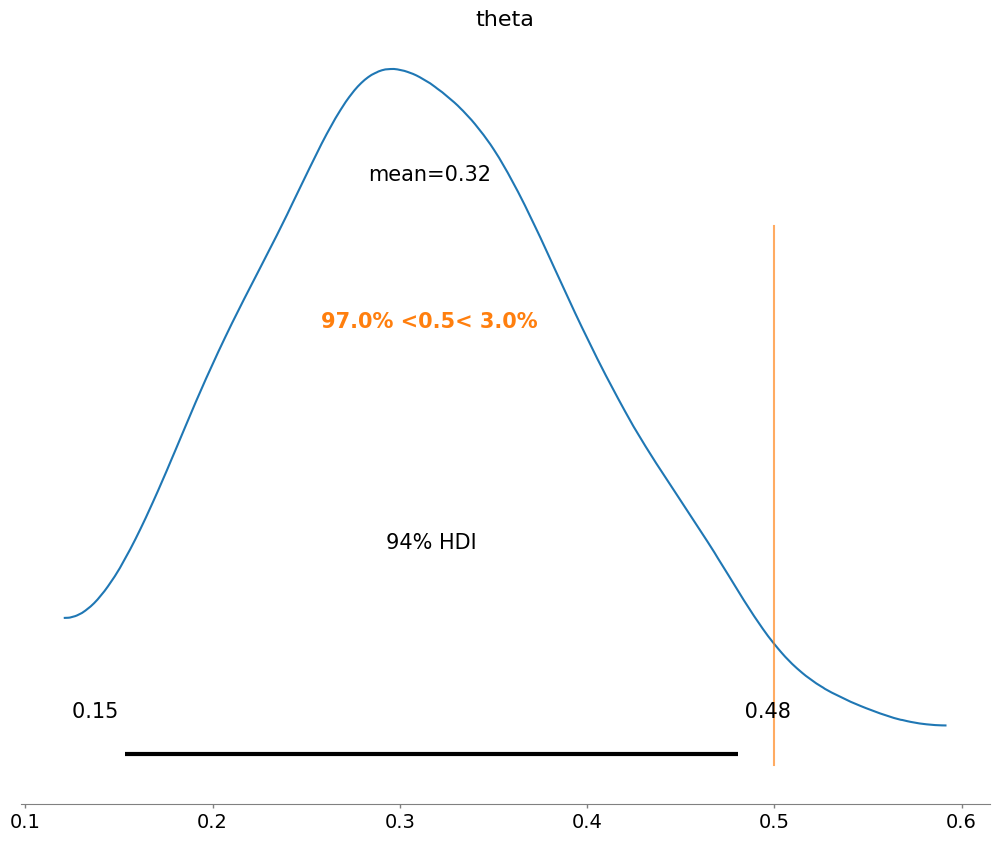

In [10]:
az.summary(trace)
az.plot_posterior(trace)
az.plot_posterior(trace, ref_val = 0.5)